# **K-nearest Neighbors Classification**

**Importing Libraries & Loading Dataset:**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

## Data Expolration

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Creating a dataframe out of iris dataset, because it's easier to visualize this dataset with a dataframe:**

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Filtering Data by Class:**

In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



> ***0 to 50 is setosa***




In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1




> ***50 to 100 is versicolor***



In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
len(df)

150

> ***100 to 150 is virginica***

**Adding Flower Names to `df` (This line converts numerical class labels (0,1,2) into their corresponding flower names (Setosa, Versicolor, Virginica) and adds them as a new column called `flower_name` in the DataFrame):**

In [10]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Visualization

In [11]:
import matplotlib.pyplot as plt

In [12]:
df_0 = df[df.target==0]
df_1 = df[df.target==1]
df_2 = df[df.target==2]

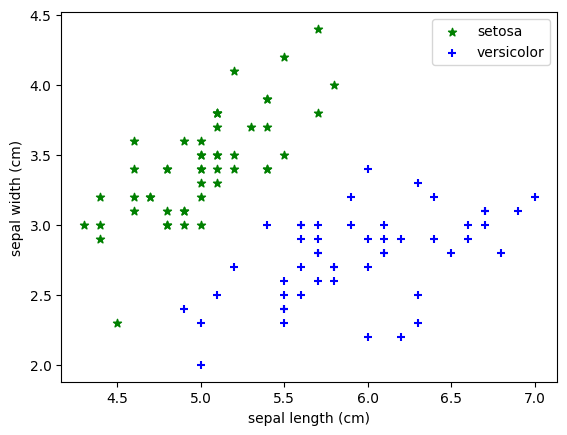

In [13]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df_0['sepal length (cm)'], df_0['sepal width (cm)'], color='green', marker='*')
plt.scatter(df_1['sepal length (cm)'], df_1['sepal width (cm)'], color='blue', marker='+')
plt.legend(df.flower_name.unique())

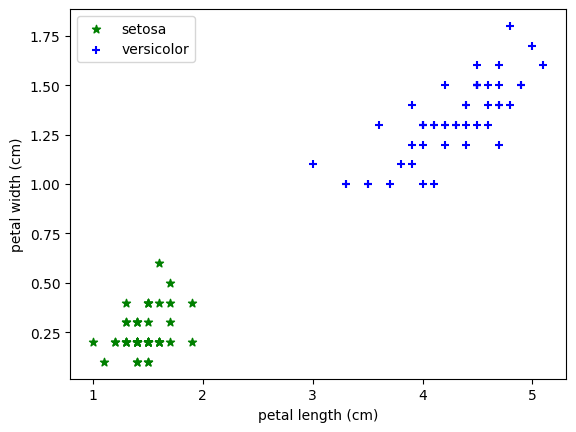

In [14]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], color='green', marker='*')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color='blue', marker='+')
plt.legend(df.flower_name.unique())

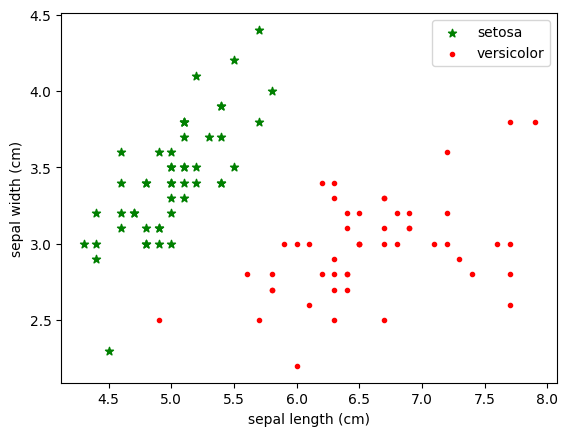

In [15]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df_0['sepal length (cm)'], df_0['sepal width (cm)'], color='green', marker='*')
plt.scatter(df_2['sepal length (cm)'], df_2['sepal width (cm)'], color='red', marker='.')
plt.legend(df.flower_name.unique())

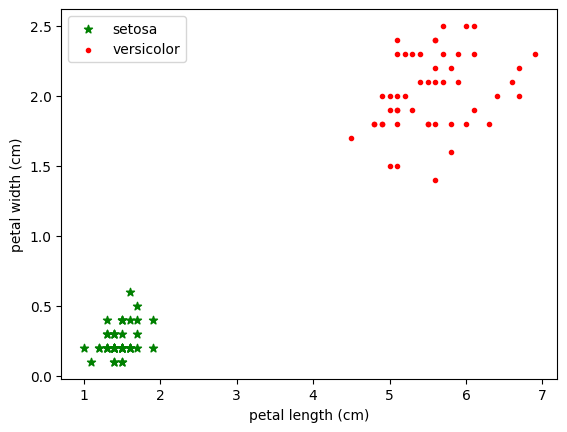

In [16]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df_0['petal length (cm)'], df_0['petal width (cm)'], color='green', marker='*')
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], color='red', marker='.')
plt.legend(df.flower_name.unique())

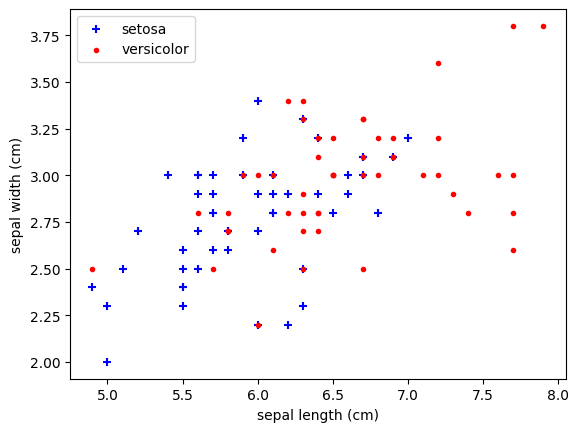

In [17]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df_1['sepal length (cm)'], df_1['sepal width (cm)'], color='blue', marker='+')
plt.scatter(df_2['sepal length (cm)'], df_2['sepal width (cm)'], color='red', marker='.')
plt.legend(df.flower_name.unique())

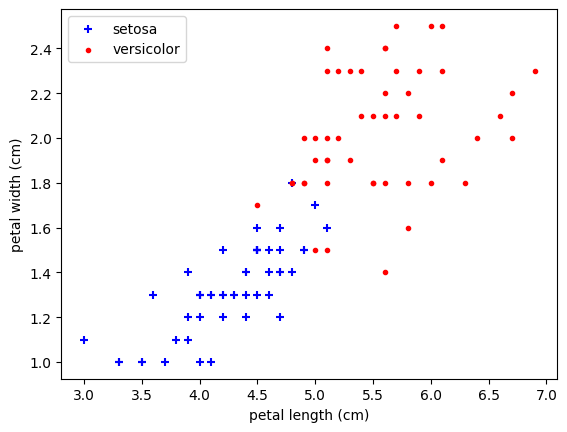

In [18]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'], color='blue', marker='+')
plt.scatter(df_2['petal length (cm)'], df_2['petal width (cm)'], color='red', marker='.')
plt.legend(df.flower_name.unique())

## Train the model:

**Preparing Data for Machine Learning:**


In [19]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y = df.target
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


**Splitting Data into Training & Testing Sets:**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
len(X_train)

120

In [23]:
len(X_test)

30

**Creating KNN (K Nearest Neighbors) Classifier:**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
knn.score(X_test, y_test)

0.9333333333333333

**Confusion Matrix:**

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

Text(58.222222222222214, 0.5, 'Truth')

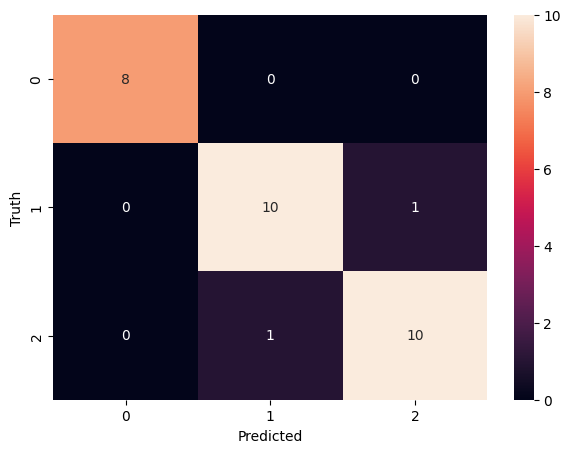

In [27]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Printing Classification Report for Precesion, Recall and F1-score for each Classes:**

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

